Notebook to test dataset and dataloader

In [1]:
import numpy as np
from data.getlandmark import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from utils import *
from torch.utils.data import Dataset, DataLoader
# Get landmark using vocadataset.py
from data.vocaset import *

Get landmark using vocaset class!

In [ ]:
testset = vocadataset("test", landmark=True)
landmark, labels = testset[0]
print(labels)

In [ ]:
print("max: ",landmark[0].max().item(), " min: ",landmark[0].min().item())

In [ ]:
def normalize_data(data):
    max_value = data.max()
    min_value = data.min()
    normalized_data = [(2 * (x - min_value) / (max_value - min_value)) - 1 for x in data]
    return torch.tensor(normalized_data)

In [ ]:
r = vocadataset("test", landmark=False)
v, la = r[0]
 
def normalize( pointcloud):
        
        norm_pointcloud = pointcloud - np.mean(pointcloud, axis=0) 
        norm_pointcloud /= np.max(np.linalg.norm(norm_pointcloud, axis=1))

        return  norm_pointcloud

In [ ]:
torch.mean(v,)

In [ ]:
plt.scatter(landmark[0][:,0], landmark[0][:,1], marker='.')
#plt.scatter(landmark[10][:,0], landmark[10][:,1], marker='.')
#plt.scatter(landmark[100][:,0], landmark[100][:,1], marker='.')

plt.show()

### Get only mouth landmark

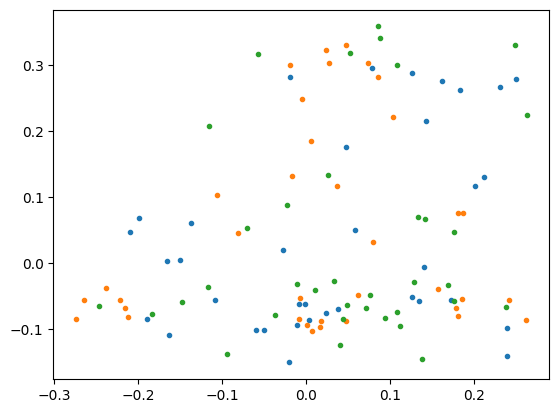

In [2]:
te = vocadataset(type="test", landmark=True, mouthOnly=True)
landmark_mouth, labels = te[0]
plt.scatter(landmark_mouth[0][:,0], landmark_mouth[0][:,1], marker='.')
plt.scatter(landmark_mouth[10][:,0], landmark_mouth[10][:,1], marker='.')
plt.scatter(landmark_mouth[200][:,0], landmark_mouth[100][:,1], marker='.')
plt.show()

In [ ]:
print(landmark_mouth[0][:5])
import torch.nn.functional as F
print(F.normalize(landmark_mouth[0][:5], p=2, dim=1))

In [ ]:
landmark_mouth[0].shape

In [ ]:

testset = vocadataset("test", landmark=True)

dataloader = DataLoader(testset, batch_size=8, collate_fn=collate_fn, shuffle=True)

landmark, len_landmark, label, len_label = next(iter(dataloader))


In [ ]:
voca = vocabulary(blank = '-')

In [ ]:
labels = char_to_index_batch(label, voca)

In [ ]:
labels.shape

In [ ]:
"""

testset = vocadataset("test", landmark=True)
vertex_frame_0 = vertex[0]
pcshow(vertex_frame_0[:,0], vertex_frame_0[:,1], vertex_frame_0[:,2])


"""